In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers
from keras.models import load_model
from PIL import Image

In [78]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [79]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship',9:'Truck'}

In [80]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [91]:
cnn10=load_model('cnn10.h5')
cnn11=load_model('cnn11.h5')
cnn12=load_model('cnn12.h5')
cnn13=load_model('cnn13.h5')
cnn14=load_model('cnn14.h5')
cnn15=load_model('cnn15.h5')
cnn16=load_model('cnn16.h5')
cnn17=load_model('cnn17.h5')
hyp1cnn10=load_model('hyp1cnn10.h5')
hyp2cnn10=load_model('hyp2cnn10.h5')
hyp3cnn15=load_model('hyp3cnn15.h5')
retrainedcnn15=load_model('retrainedcnn15.h5')
retrained2cnn15=load_model('retrained2cnn15.h5')
retrained3cnn15=load_model('retrained3cnn15.h5')
resnet1=load_model('resnet1.h5')
resnet2=load_model('resnet2.h5')
effnet1=load_model('Effnet1.h5')
effnet2=load_model('Effnet2.h5')

In [92]:
models=[cnn10,cnn11,cnn12,cnn13,cnn14,cnn15,cnn16,cnn17,hyp1cnn10,hyp2cnn10,hyp3cnn15,
        retrainedcnn15,retrained2cnn15,retrained3cnn15,resnet1,resnet2,effnet1,effnet2]
name=['Base_cnn','cnn_earlystopping','cnn_LRreduce','cnn_LRScheduler_EarlyStopping','cnn_LRScheduler_Checkpoint',
     'cnn_LRreduce2','cnn_LR_CHk','cnn_LR_CHK_earlystopping','cnn10_tuning_kernalsize','cnn10_tuning_filters_kernelsize',
      'cnn15_tuned_LearningRate','Retrain_cnn_10epochs','Retrain_cnn_5epochs','Retrain_cnn_3epochs','Resnet50 with 64 nodes',
     'Resnet50 with 80 nodes','EfficentNetB0 with 80 nodes','EfficientNetB0 with 20 Epochs']

In [93]:
acc=[]
for i in models:
    result9 = i.predict(X_test)
    res9 = np.argmax(result9,axis=1)
    acc+=[accuracy_score(y_test,res9)]
    

313/313 [==============================] - 11s 31ms/step


In [94]:
acc1=[0.9154,0.8575,0.9688,0.9192,0.9721,0.9746,0.9985,0.8966,0.9483,0.9472,0.96934,0.9748,0.8748,0.8273,0.9166,0.9913,0.9316,0.9388]

In [95]:
d={'Model':name,'Acc_test':acc,'Acc_train':acc1}

In [96]:
results=pd.DataFrame(d)

In [97]:
results

,Model,Acc_test,Acc_train
0,Base_cnn,0.7537,0.91540
1,cnn_earlystopping,0.7595,0.85750
2,cnn_LRreduce,0.7706,0.96880
3,cnn_LRScheduler_EarlyStopping,0.7597,0.91920
4,cnn_LRScheduler_Checkpoint,0.7636,0.97210
5,cnn_LRreduce2,0.7908,0.97460
6,cnn_LR_CHk,0.7790,0.99850
7,cnn_LR_CHK_earlystopping,0.7488,0.89660
8,cnn10_tuning_kernalsize,0.7663,0.94830
9,cnn10_tuning_filters_kernelsize,0.7786,0.94720


In [98]:
results.sort_values('Acc_test',ascending=False)

,Model,Acc_test,Acc_train
17,EfficientNetB0 with 20 Epochs,0.8355,0.93880
15,Resnet50 with 80 nodes,0.8346,0.99130
16,EfficentNetB0 with 80 nodes,0.8277,0.93160
10,cnn15_tuned_LearningRate,0.7915,0.96934
5,cnn_LRreduce2,0.7908,0.97460
14,Resnet50 with 64 nodes,0.7790,0.91660
6,cnn_LR_CHk,0.7790,0.99850
9,cnn10_tuning_filters_kernelsize,0.7786,0.94720
2,cnn_LRreduce,0.7706,0.96880
8,cnn10_tuning_kernalsize,0.7663,0.94830


# Testing

In [135]:
import os

In [137]:
main='C:\\Users\\40027784\\Neural Networks\\image'
files =  os.path.join(main)
file_names=os.listdir(files)

In [191]:
l=[]
for i in file_names:
    b=[]
    a=i.split('.')
    for j in a[0]:
        if j.isdigit():
            continue
        else:
            b+=[j]
    if ''.join(b).title()=='Car':
        l+=['Automobile']
    elif ''.join(b).title()=='Boat':
        l+=['Ship']
    elif ''.join(b).title()=='Peacock':
        l+=['Bird']
    else:
        l+=[''.join(b).title()]
        
l

['Bird',
 'Ship',
 'Automobile',
 'Automobile',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Deer',
 'Dog',
 'Dog',
 'Dog',
 'Lipord',
 'Bird',
 'Plane',
 'Plane',
 'Plane',
 'Plane',
 'Ship ',
 'Ship',
 'Ship',
 'Ship']

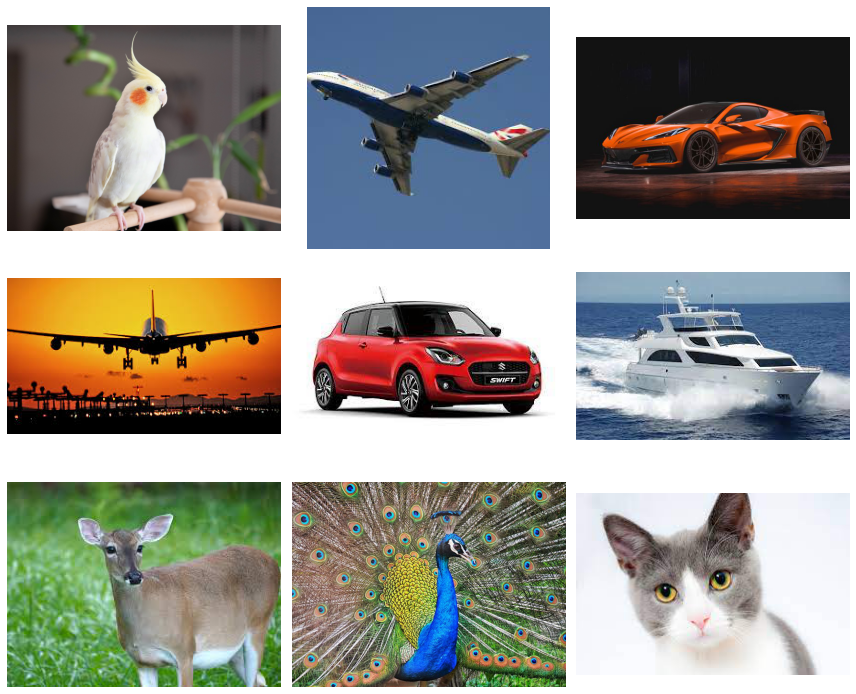

In [130]:
fig,((ax1, ax2, ax3),(ax4,ax5, ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9]
image=['bird1.jpg','plane2.jfif','car1.jpg','plane3.jfif','car2.jfif','boat1.jfif','deer1.jfif','peacock.jpg','cat1.jfif']
for i,j in zip(range(0,10),image):
    img=Image.open(j)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [193]:
d1=dict(zip(file_names,l))
d1

{'bird1.jpg': 'Bird',
 'boat1.jfif': 'Ship',
 'car1.jpg': 'Automobile',
 'car2.jfif': 'Automobile',
 'cat1.jfif': 'Cat',
 'cat2.jfif': 'Cat',
 'cat3.jfif': 'Cat',
 'cat4.jfif': 'Cat',
 'deer1.jfif': 'Deer',
 'dog1.jfif': 'Dog',
 'dog2.jfif': 'Dog',
 'dog3.jfif': 'Dog',
 'lipord.jfif': 'Lipord',
 'peacock.jpg': 'Bird',
 'plane.jpg': 'Plane',
 'plane2.jfif': 'Plane',
 'plane3.jfif': 'Plane',
 'plane7.jfif': 'Plane',
 'ship 3.jfif': 'Ship ',
 'ship1.jfif': 'Ship',
 'ship2.jpg': 'Ship',
 'ship4.jfif': 'Ship'}

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 19ms/step


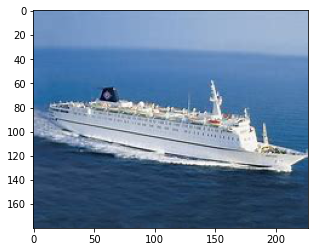

In [194]:
score=0
output={}
models=[cnn10,cnn11,cnn12,cnn13,cnn14,cnn15,cnn16,cnn17,hyp1cnn10,hyp2cnn10,hyp3cnn15,
        retrainedcnn15,retrained2cnn15,retrained3cnn15,resnet1,resnet2,effnet1,effnet2]
name=['Base_cnn','cnn_earlystopping','cnn_LRreduce','cnn_LRScheduler_EarlyStopping','cnn_LRScheduler_Checkpoint',
     'cnn_LRreduce2','cnn_LR_CHk','cnn_LR_CHK_earlystopping','cnn10_tuning_kernalsize','cnn10_tuning_filters_kernelsize',
      'cnn15_tuned_LearningRate','Retrain_cnn_10epochs','Retrain_cnn_5epochs','Retrain_cnn_3epochs','Resnet50 with 64 nodes',
     'Resnet50 with 80 nodes','EfficentNetB0 with 80 nodes','EfficientNetB0 with 20 Epochs']

for i,k in zip(models,name):
    score=0
    for j in d1.keys():
        img=Image.open(os.path.join(main,j))
        plt.imshow(img)
        img=img.resize((32,32))
        img1=np.array(img)
        img1=np.reshape(img1,[-1, 32, 32, 3])
        img1=img1.astype('float')
        img1/=255
        pred=labels[np.argmax(i.predict(img1))]
        if pred==d1[j]:
            score+=1
    output[k]=score
    

In [196]:
output

{'Base_cnn': 13,
 'cnn_earlystopping': 10,
 'cnn_LRreduce': 13,
 'cnn_LRScheduler_EarlyStopping': 10,
 'cnn_LRScheduler_Checkpoint': 11,
 'cnn_LRreduce2': 11,
 'cnn_LR_CHk': 11,
 'cnn_LR_CHK_earlystopping': 12,
 'cnn10_tuning_kernalsize': 13,
 'cnn10_tuning_filters_kernelsize': 14,
 'cnn15_tuned_LearningRate': 11,
 'Retrain_cnn_10epochs': 7,
 'Retrain_cnn_5epochs': 7,
 'Retrain_cnn_3epochs': 8,
 'Resnet50 with 64 nodes': 11,
 'Resnet50 with 80 nodes': 11,
 'EfficentNetB0 with 80 nodes': 13,
 'EfficientNetB0 with 20 Epochs': 12}

In [180]:

for j,k in zip(d1.keys(),d1.values()):
    img=Image.open(os.path.join(main,j))
    img=img.resize((32,32))
    img1=np.array(img)
    img1=np.reshape(img1,[-1, 32, 32, 3])
    img1=img1.astype('float')
    img1/=255
    pred=labels[np.argmax(hyp2cnn10.predict(img1))]
    print(pred,k)


1/1 [==============================] - 0s 18ms/step
Bird Bird
1/1 [==============================] - 0s 18ms/step
Ship Boat
1/1 [==============================] - 0s 18ms/step
Automobile Automobile
1/1 [==============================] - 0s 19ms/step
Automobile Automobile
1/1 [==============================] - 0s 19ms/step
Cat Cat
1/1 [==============================] - 0s 19ms/step
Deer Cat
1/1 [==============================] - 0s 19ms/step
Cat Cat
1/1 [==============================] - 0s 18ms/step
Cat Cat
1/1 [==============================] - 0s 18ms/step
Deer Deer
1/1 [==============================] - 0s 18ms/step
Dog Dog
1/1 [==============================] - 0s 17ms/step
Dog Dog
1/1 [==============================] - 0s 18ms/step
Dog Dog
1/1 [==============================] - 0s 18ms/step
Frog Lipord
1/1 [==============================] - 0s 18ms/step
Bird Peacock
1/1 [==============================] - 0s 19ms/step
Cat Plane
1/1 [==============================] - 0s 23ms/step
Ai

1/1 [==============================] - 0s 18ms/step
{'Base_cnn': 'Ship', 'cnn_earlystopping': 'Frog', 'cnn12': 'Frog', 'CNN13': 'Ship', 'CNN14': 'Frog', 'CNN15': 'Frog', 'CNN16': 'Bird', 'CNN17': 'Frog', 'hyp1cnn10': 'Ship', 'hyp2CNN10': 'Automobile', 'hyp3cnn15': 'Frog', 'retrain10': 'Dog', 'retrain5': 'Dog', 'retrain3': 'Dog', 'resnet1': 'Automobile', 'resnet2': 'Automobile', 'effnet1': 'Ship', 'effnet2': 'Frog'}


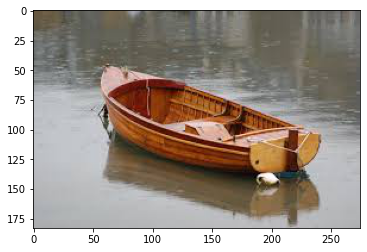

In [162]:
img=Image.open(os.path.join(main,'ship1.jfif'))
plt.imshow(img)
img=img.resize((32,32))
img1=np.array(img)
img1=np.reshape(img,[-1, 32, 32, 3])
img1=img1.astype('float')
img1/=255
d={'Base_cnn':labels[np.argmax(cnn10.predict(img1))],'cnn_earlystopping':labels[np.argmax(cnn11.predict(img1))],
   'cnn12':labels[np.argmax(cnn12.predict(img1))],
  'CNN13':labels[np.argmax(cnn13.predict(img1))],'CNN14':labels[np.argmax(cnn14.predict(img1))],'CNN15':labels[np.argmax(cnn15.predict(img1))],
  'CNN16':labels[np.argmax(cnn16.predict(img1))],'CNN17':labels[np.argmax(cnn17.predict(img1))],'hyp1cnn10':labels[np.argmax(hyp1cnn10.predict(img1))],
  'hyp2CNN10':labels[np.argmax(hyp2cnn10.predict(img1))],'hyp3cnn15':labels[np.argmax(hyp3cnn15.predict(img1))],
  'retrain10':labels[np.argmax(retrainedcnn15.predict(img1))],'retrain5':labels[np.argmax(retrained2cnn15.predict(img1))],
  'retrain3':labels[np.argmax(retrained3cnn15.predict(img1))],'resnet1':labels[np.argmax(resnet1.predict(img1))],
  'resnet2':labels[np.argmax(resnet2.predict(img1))],'effnet1':labels[np.argmax(effnet1.predict(img1))],
  'effnet2':labels[np.argmax(effnet2.predict(img1))]}
print(d)